# Exercise 7 - Solutions

### 1: Review Exercises
#### 1) 
The indicator function $1[x\: in\: A]$ returns a $1$ whenever $x$ is contained in $A$ and returns a $0$ otherwise.
#### 2) 
Continuous or numeric data, ordered data, and categorical data.
#### 3)
Let $A$ be a set. Then the linear regression model on this set of categories is
$$
y = \sum_{a\in A} \beta_a 1[x\textrm{ = }a] + \epsilon,\quad x \textrm{ in } A.
$$
#### 4) 
$C(x)$ tells `statsmodels` that $x$ is a categorical variable.
#### 5) 
The $-1$ removes the constant from the regression model. When  $C(x)$ is supplied, `statsmodels` will expand $x$ as a categorical variable taking into account the constant (one category is going to be absorbed by the intercept). $C(x)-1$ avoids this.
#### 6) 
Excluding the constants makes it hard to interpret the p-values. In the penguin example, we do not care about whether the bill length is unlikely to be $0$ for every island, rather we are interested in the difference between the islands. 

### Exercise 2: Penguin Plots

First, import `seaborn` and the `penguins` data.

In [1]:
import seaborn as sns
penguins = sns.load_dataset("penguins")

#### a)
We can now visualize the data using `catplot`

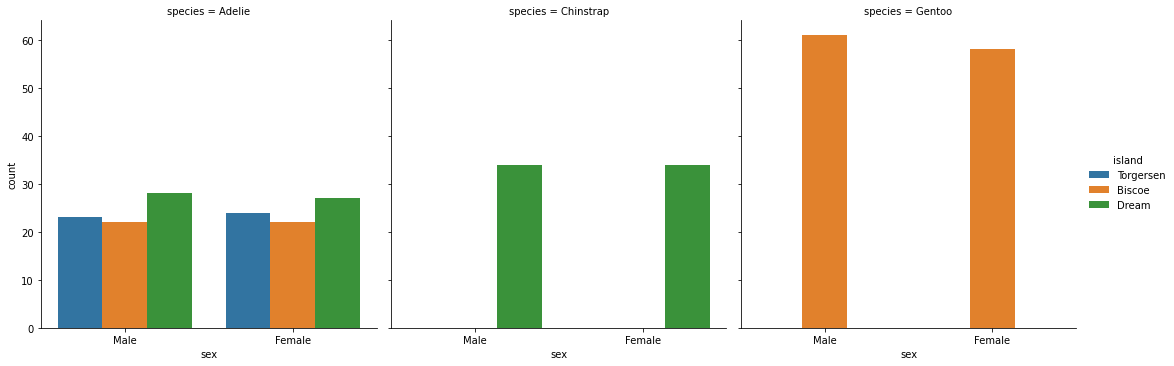

In [2]:
sns.catplot(x="sex",hue="island",col="species",data=penguins, kind="count")

Looking at the plot, we can see some interesting data features:
* The species Adelie seems to be common on all three islands
* Species Chinstrap and Gentoo, however, only seem to be prevalent on Dream and Biscoe, respectively. 
* Only species Adelie seems to be living on Torgersen.
* Adelie is the largest species.
* There are roughly equally as many males as females.

We can see some of these features better by inverting the plot.

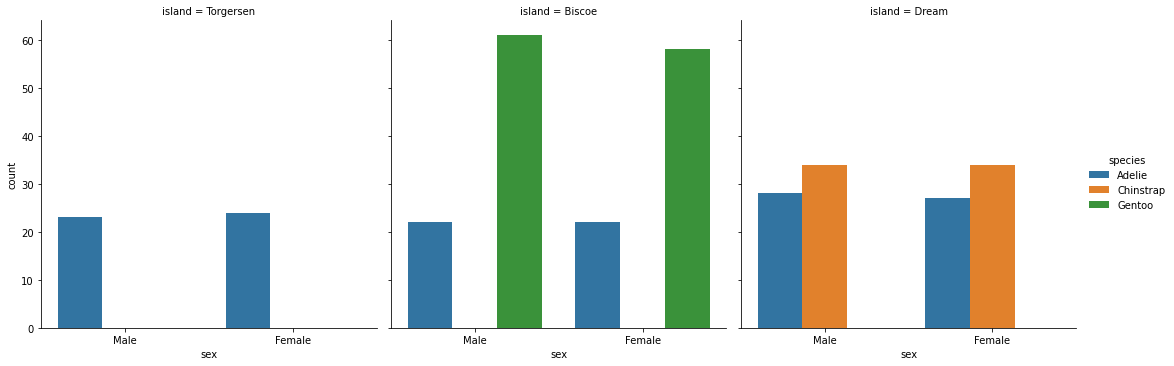

In [3]:
sns.catplot(x="sex",hue="species",col="island",data=penguins, kind="count")

#### b) 

Looking at our results from above, neither `species` nor `islands` should be good predictors of sex.

In [4]:
import statsmodels.formula.api as smf
import pandas as pd

# drop the missing values
penguins = penguins.dropna()

# convert sex to numeric
penguins["sex2"] = 1 * (penguins.sex == "Male")

# run the logistic regression
fit = smf.logit("sex2 ~ C(island) + C(species)", data = penguins).fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.692974
         Iterations 3


<ipython-input-4-8eb75001f2c4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins["sex2"] = 1 * (penguins.sex == "Male")


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   sex2   No. Observations:                  333
Model:                          Logit   Df Residuals:                      328
Method:                           MLE   Df Model:                            4
Date:                Sat, 09 Oct 2021   Pseudo R-squ.:               0.0001908
Time:                        15:15:17   Log-Likelihood:                -230.76
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                    0.9991
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -4.479e-17      0.302  -1.49e-16      1.000      -0.591       0.591
C(island)[T.Dream]          0.0364      0.405      0.090      0.928      -0.757       0.829
C(island)[T.Torgersen]     -0.0426      0.420     -0.101      0.919      -0.865       0.780
C(species)[T.Chinstrap]    -0.0364      0.363     -0.100      0.920      -0.747       0.675
C(species)[T.Gentoo]        0.0504      0.353      0.143      0.886      -0.641       0.742
===========================================================================================
"""

Running the regression confirms this suspicion. 

#### c)

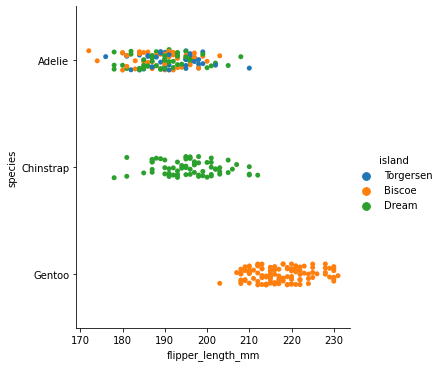

In [5]:
sns.catplot(x="flipper_length_mm",hue="island",y="species", data=penguins)

Species Gentoo seems to have the largest flipper length on average. In addition, Chinstrap penguins on average seem to have slightly longer flippers than Adelie penguins.

### 3: Interpreting Penguins

In [6]:
import seaborn as sns
import statsmodels.formula.api as smf
penguins = sns.load_dataset("penguins")
fit = smf.ols("bill_length_mm ~ island + species + sex", data = penguins).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     302.0
Date:                Sat, 09 Oct 2021   Prob (F-statistic):          3.36e-120
Time:                        15:15:17   Log-Likelihood:                -750.43
No. Observations:                 333   AIC:                             1513.
Df Residuals:                     327   BIC:                             1536.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               37.1263      0.373     99.550      0.000      36.393      37.860
island[T.Dream]         -0.4886      0.470     -1.039      0.300      -1.414       0.436
island[T.Torgersen]      0.1026      0.488      0.210      0.833      -0.857       1.062
species[T.Chinstrap]    10.3474      0.422     24.541      0.000       9.518      11.177
species[T.Gentoo]        8.5465      0.410     20.834      0.000       7.739       9.353
sex[T.Male]              3.6975      0.255     14.508      0.000       3.196       4.199
==============================================================================
Omnibus:                       35.395   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.335
Skew:                           0.523   Prob(JB):                     4.86e-19
Kurtosis:                       5.233   Cond. No.                         7.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### a) 
The adjusted $R^2$ is large, i.e. the model predicts bill length very well. Judging by the t-statistics and p-values, the results appear to be driven by the species and sex, rather than the island. This, however, makes intuitive sense given how the different species are distributed across the islands. As an example, the probability of observing a coefficient as extreme as 3.69 (sex[T.Male]), given the $H0$ of the coefficient being zero were true, is 0.

#### b) 
Biscoe, Adelie and Female are absorbed into the intercept. 

#### c) 
##### i)

In [7]:
fit.params

Intercept               37.126271
island[T.Dream]         -0.488613
island[T.Torgersen]      0.102633
species[T.Chinstrap]    10.347437
species[T.Gentoo]        8.546461
sex[T.Male]              3.697459
dtype: float64

In [8]:
fit.params[0]+fit.params[4]

45.672731284075574

##### ii)

In [9]:
fit.params[0]+fit.params[1]+fit.params[3]+fit.params[-1]

50.682552850682384

##### iii)

In [10]:
fit.params[0]

37.12627067872937

#### d) 

In [11]:
# create a new column
penguins['species2'] = penguins.species.apply(lambda x: x == 'Adelie' or x=='Chinstrap')

# compute model fit2
fit2 = smf.ols("bill_length_mm ~ island + species2 + sex", data = penguins).fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     80.09
Date:                Sat, 09 Oct 2021   Prob (F-statistic):           2.40e-47
Time:                        15:15:18   Log-Likelihood:                -924.33
No. Observations:                 333   AIC:                             1859.
Df Residuals:                     328   BIC:                             1878.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              45.6903      0.421    108.589      0.000      44.863      46.518
island[T.Dream]         5.2321      0.687      7.611      0.000       3.880       6.584
island[T.Torgersen]     0.1023      0.821      0.125      0.901      -1.513       1.717
species2[T.True]       -8.5469      0.690    -12.378      0.000      -9.905      -7.189
sex[T.Male]             3.6631      0.429      8.539      0.000       2.819       4.507
==============================================================================
Omnibus:                        1.565   Durbin-Watson:                   0.720
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                1.365
Skew:                           0.044   Prob(JB):                        0.505
Kurtosis:                       3.301   Cond. No.                         7.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
fit2.params[0]+fit2.params[3]

37.14345488033901

#### e) 

In [13]:
fit2.params[0]

45.69034870085173

The estimated coefficient is basically the same.

### 4: Indicator functions and regression

In [14]:
import pyreadr, os, pathlib

def pyreadr_load(url, local_file = "temp_pyreadr.rda"):
    """
    Download the R dataset at the specified url into local_file, load the 
    local file, delete the local file. Return the dataset.
    """
  
    file_name = pyreadr.download_file(url, local_file)
    dataframe = pyreadr.read_r(file_name)
    os.remove(str(pathlib.Path().resolve()) + "/" + file_name)
    name = next(iter(dataframe.items()))[0]
    return dataframe[name]


url = 'https://github.com/kassambara/datarium/blob/master/data/titanic.raw.rda?raw=true'
titanic = pyreadr_load(url)
titanic.head()

,Class,Sex,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No



#### a)
$$
\textrm{survived} = a_{female} + \beta_{\textrm{male}}1[\textrm{sex} =\textrm{male}]+   \epsilon
$$

#### b) 

$$
\textrm{survived} = a_{\textrm{1st class}} + \beta_{\textrm{2nd class}}1[\textrm{class} =\textrm{2nd class}]
+ \beta_{\textrm{3nd class}}1[\textrm{class} =\textrm{3nd class}]
+ \beta_{\textrm{crew}}1[\textrm{class} =\textrm{crew}]
+   \epsilon
$$

#### c)

$$
\textrm{survived} = a_{\textrm{1st class, female}} + \beta_{\textrm{2nd class}}1[\textrm{class} =\textrm{2nd class}]
+ \beta_{\textrm{3nd class}}1[\textrm{class} =\textrm{3nd class}]
+ \beta_{\textrm{crew}}1[\textrm{class} =\textrm{crew}]
+ \beta_{\textrm{male}}1[\textrm{sex} =\textrm{male}]
+   \epsilon
$$

### 5) Interpreting Logistic Regression

#### a)
Generate the data:

In [15]:
import numpy as np
import pandas as pd
rng = np.random.default_rng(313)
x = rng.random((1000000, 4))

#### b)
Generate y:

In [16]:
beta = [1, 2, 3, 4]
y = x @ np.array(beta) + rng.logistic(size = 1000000)

#### c)
Generate z, based on the computed y values:

In [17]:
z = y >= 0

#### d)
Compute the logistic regression model:

In [18]:
df = pd.DataFrame(np.c_[x,y,z], columns = ["x1", "x2", "x3", "x4", "y", "z"])
fit = smf.logit("z ~ x1 + x2 + x3 + x4", data = df).fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.077413
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      z   No. Observations:              1000000
Model:                          Logit   Df Residuals:                   999995
Method:                           MLE   Df Model:                            4
Date:                Sat, 09 Oct 2021   Pseudo R-squ.:                  0.1838
Time:                        15:15:29   Log-Likelihood:                -77413.
converged:                       True   LL-Null:                       -94846.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0599      0.022      2.713      0.007       0.017       0.103
x1             0.9272      0.027     34.938      0.000       0.875       0.979
x2             2.0055      0.028     71.139      0.000       1.950       2.061
x3             2.9587      0.031     95.651      0.000       2.898       3.019
x4             3.9837      0.035    114.055      0.000       3.915       4.052
==============================================================================
"""

The coefficients are close to the "true" value.